# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%205-%20Deep%20Computer%20Vision/CNN_python/Module%205-%20CNN_Fashion_MNIST_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 5- Deep Computer Vision- Convolutional Neural Networks (CNN)

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow https://www.tensorflow.org/install



In [1]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data

In this notebook, we will be working with fashion mnist data set: https://www.kaggle.com/datasets/zalando-research/fashionmnist
* 60,000 train images
* 10,000 test images
* image size (28,28)

**Labels**

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


The data set is balanced!

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

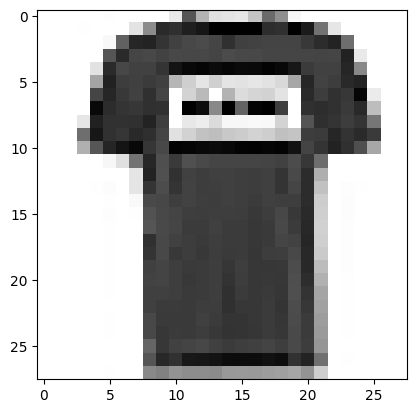

In [8]:
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [9]:
y_train[1]

0

There are two ways we can handle the target variable:
1. Using one-hot encoding + categorical_crossentropy loss function
2. Using integer labels  + sparse_categorical_crossentropy loss function.


When it comes to multi-class classification, it may not make a big difference whether you use integer labels or one-hot encoded labels, as long as the model is able to learn to predict the correct class. However, there are several benefits to using one-hot encoding for categorical variables in general:
* No implied ordering
* Better generalization: One-hot encoding can lead to better generalization to new data because it allows the model to learn more distinct boundaries between the classes. With integer labels, the model may be tempted to interpolate between adjacent classes, which can lead to overfitting on the training data.
* Easier to interpret: One-hot encoding provides a clear and interpretable representation of the classes. Each class is represented by a binary vector, where each element corresponds to a different class.


In [10]:
y_train.shape

(60000,)

In [11]:
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train, num_classes=10)
y_train_ohe.shape

(60000, 10)

In [12]:
# alternative way to do one hot encoding
import tensorflow as tf
y_test_ohe = tf.one_hot(y_test, depth=10)
y_test_ohe.shape

TensorShape([10000, 10])

# Creating an ANN model as benchmark
let's start by an ANN model and see how we can improve that. We are not trying to optimize the ANN model, so let's do a quick sequential approach.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [14]:
print(f'Train set shape is: {x_train.shape}')
print(f'Test set shape is: {x_test.shape}')

Train set shape is: (60000, 28, 28)
Test set shape is: (10000, 28, 28)


In [15]:
# we need to flatten images and pass it to a FCN.
x_train_ann = x_train.reshape(60000, 28*28)
x_train_ann = x_train_ann / 255.0

x_test_ann = x_test.reshape(10000, 28*28)
x_test_ann = x_test_ann / 255.0

In [16]:
x_train_ann.shape

(60000, 784)

In [17]:
ann_model = keras.Sequential(name="ann_mnist")
ann_model.add(layers.Input(shape=(784,))) # this is the shape of each sample!
ann_model.add(layers.Dense(units = 512, activation = 'relu', name="first_layer"))

#output layer
ann_model.add(layers.Dense(units = 10, activation = 'softmax', name="output_layer"))

In [18]:
ann_model.summary()

Model: "ann_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 512)               401920    
                                                                 
 output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#params
784*512+512


401920

In [20]:
512*10+10

5130

In [21]:
ann_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="ANN_benchmark.h5",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [23]:
ann_model.fit(x_train_ann, y_train_ohe, validation_data=(x_test_ann, y_test_ohe), epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 [==============================] - 11s 8ms/step - loss: 0.5652 - accuracy: 0.7980 - val_loss: 0.4800 - val_accuracy: 0.8206
Epoch 2/20
 23/469 [>.............................] - ETA: 2s - loss: 0.3968 - accuracy: 0.8611

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 3s 6ms/step - loss: 0.3883 - accuracy: 0.8578 - val_loss: 0.4391 - val_accuracy: 0.8335
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3428 - accuracy: 0.8740 - val_loss: 0.4034 - val_accuracy: 0.8478
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3144 - accuracy: 0.8849 - val_loss: 0.3526 - val_accuracy: 0.8711
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2961 - accuracy: 0.8912 - val_loss: 0.3640 - val_accuracy: 0.8710
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2795 - accuracy: 0.8972 - val_loss: 0.3356 - val_accuracy: 0.8801
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2672 - accuracy: 0.9010 - val_loss: 0.3695 - val_accuracy: 0.8670
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2554 - accuracy: 0.9044 - val_loss: 0.3479 - val_accuracy: 0.8788
Epoch 9/20
469/46

In [24]:
test_model = keras.models.load_model("ANN_benchmark.h5")
test_model.evaluate(x_test_ann, y_test_ohe)

313/313 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.8912


[0.32726749777793884, 0.8912000060081482]

ANN accuracy in the test set is around 89%. We want to see how CNN improves this accuracy.

# Convolutional Neural Networks (CNN)

In [25]:
# reshaping
x_train.shape

(60000, 28, 28)

In [26]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

## Creating a CNN model:

This is the benchmark CNN we build. No regularization (no drop out or data augmentation)


In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)

    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [31]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [32]:
# params
1*(3*3)*32 + 32

320

In [33]:
32*(3*3)*64+64

18496

In [34]:
64*(3*3)*128+128

73856

In [35]:
3*3*128

1152

In [36]:
1152*10+10

11530

output shape:
* channels are the number of filters
* new size = $floor(\frac{n_{old} + 2p - f}{s} + 1)$
* each pooling will half the width and height

In [37]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32)
np.floor(((28+0-3)/1)+1)

26.0

## Model fit


In [38]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_basic.h5",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [39]:
history = model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 [==============================] - 9s 7ms/step - loss: 0.6105 - accuracy: 0.7731 - val_loss: 0.4349 - val_accuracy: 0.8378
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3689 - accuracy: 0.8674 - val_loss: 0.3695 - val_accuracy: 0.8670
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3104 - accuracy: 0.8866 - val_loss: 0.3140 - val_accuracy: 0.8859
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2777 - accuracy: 0.8990 - val_loss: 0.3179 - val_accuracy: 0.8898
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2545 - accuracy: 0.9086 - val_loss: 0.2776 - val_accuracy: 0.9020
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2336 - accuracy: 0.9153 - val_loss: 0.2785 - val_accuracy: 0.9012
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2170 - accuracy: 0.9205 - val_loss: 0.2600 - val_accuracy: 0.9052
Epoch 

In [41]:
test_model = keras.models.load_model("CNN_basic.h5")
test_model.evaluate(x_test, y_test_ohe)

313/313 [==============================] - 3s 7ms/step - loss: 0.2573 - accuracy: 0.9117


[0.2573458254337311, 0.9117000102996826]

As you can see, the CNN performs better in the test set with 91% accuracy.

## Model evaluation

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
metrics = pd.DataFrame(history.history)

In [44]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.610542,0.773083,0.434872,0.8378
1,0.368939,0.867450,0.369508,0.8670
2,0.310411,0.886583,0.313965,0.8859
3,0.277691,0.898967,0.317917,0.8898
4,0.254483,0.908617,0.277572,0.9020


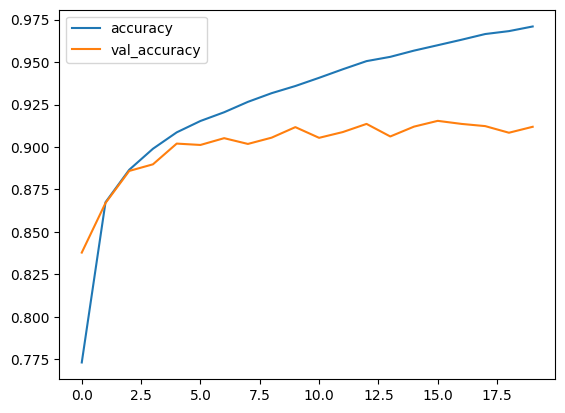

In [45]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

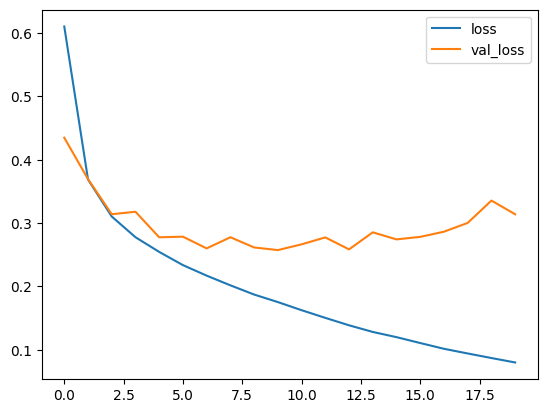

In [46]:
metrics[['loss','val_loss']].plot()
plt.show()

# Data Augmentation

We will be using Data augmentation as a regularization technique to avoid overfitting caused by having too few samples to learn from. In Keras, this can be done by adding a number of data augmentation layers at the
start of your model.

image augmentation layers in [keras](https://keras.io/api/layers/preprocessing_layers/image_augmentation/)!


Note: **ImageDataGenerator** is deprecated in tensorflow 2.1: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator



In [59]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(0.1),
        #layers.RandomZoom(0.2),
    ]
)

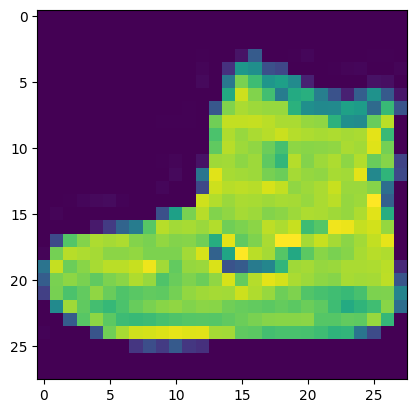

In [60]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [61]:
image = x_train[0]
image.shape

(28, 28, 1)

In [62]:
data_augmentation(image).numpy().shape

(28, 28, 1)

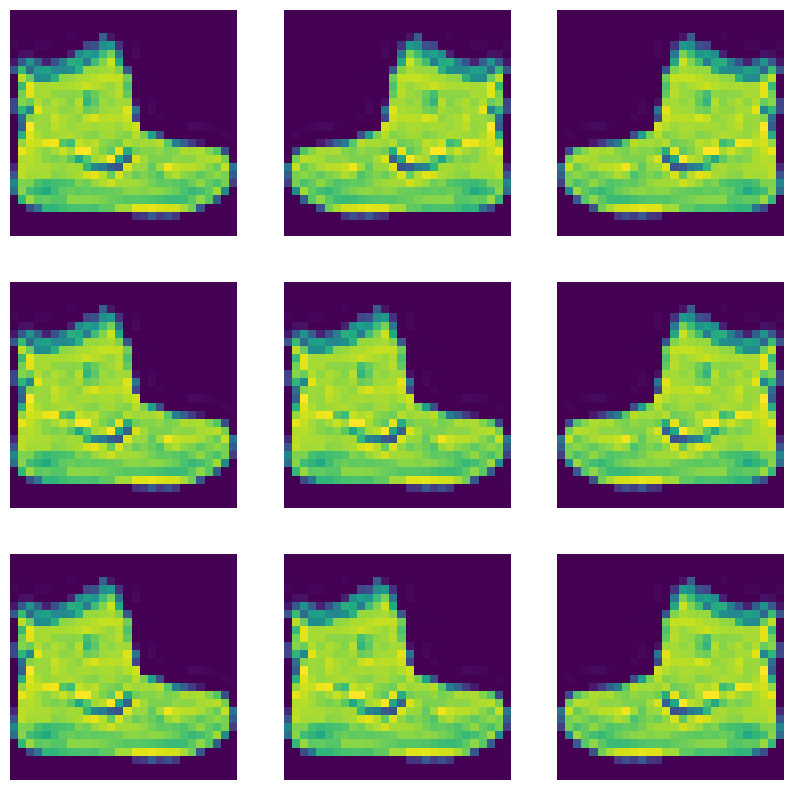

In [63]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(augmented_images.numpy().reshape(28,28))
    plt.axis("off")

In [64]:
x= data_augmentation(x_train)
x.shape


TensorShape([60000, 28, 28])

In [65]:
x = tf.expand_dims(x, axis=-1)
x.shape

TensorShape([60000, 28, 28, 1])

In [66]:
x = tf.squeeze(x, axis=-1)
x.shape

TensorShape([60000, 28, 28])

In [67]:
def CNN_builder_augmented():
  inputs= keras.Input(shape=(28,28,1), name='Input layer')
  x = data_augmentation(inputs)
  x = layers.Rescaling(1./255)(x)  # Add rescaling to normalize the data
  # Explicitly set the shape to ensure the augmented data is in the correct format
  x = layers.Reshape((28, 28, 1))(x)
  x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
  x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
  x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
  x = layers.Flatten(name="flattening_layer")(x)
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

  model = keras.Model(inputs= inputs , outputs=outputs, name='CNN_augmented_model')

  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [68]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()


Model: "CNN_augmented_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 sequential_1 (Sequential)   (28, 28, 1)               0         
                                                                 
 rescaling_1 (Rescaling)     (None, 28, 28)            0         
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)

## Model fit


In [69]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_augmented.h5",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [70]:
history = model_augmented.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 [==============================] - 5s 7ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3002 - val_accuracy: 0.1777
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 1.7422 - accuracy: 0.3830 - val_loss: 1.1751 - val_accuracy: 0.5703
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 1.1482 - accuracy: 0.5666 - val_loss: 1.0279 - val_accuracy: 0.6191
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.9882 - accuracy: 0.6339 - val_loss: 0.8622 - val_accuracy: 0.6843
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.8582 - accuracy: 0.6782 - val_loss: 0.7805 - val_accuracy: 0.7096
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.7723 - accuracy: 0.7074 - val_loss: 0.7184 - val_accuracy: 0.7283
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.7111 - accuracy: 0.7307 - val_loss: 0.6815 - val_accuracy: 0.7479
Epoch

In [71]:
model_augmented.evaluate(x_test, y_test_ohe)

313/313 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8256


[0.47985321283340454, 0.8256000280380249]

For this dataset, the data augmentation was not that helpful because of multiple reasons:
1. The original train set is not that small (60k images)
2. very low resolution and centered data!
3. we added the drop out layer to avoid overfitting, this means that we need to run the model for more epochs (50 at least).

Besides, it is not efficient to do data augmentation like this! because we are not taking advantage of GPU computation. In the next notebook, I show you how to do data augmentation using batches for a small dataset.

## Model evaluation

In [72]:
metrics = pd.DataFrame(history.history)

In [73]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,2.302608,0.099800,2.300186,0.1777
1,1.742165,0.382967,1.175142,0.5703
2,1.148198,0.566633,1.027936,0.6191
3,0.988193,0.633950,0.862154,0.6843
4,0.858213,0.678217,0.780535,0.7096


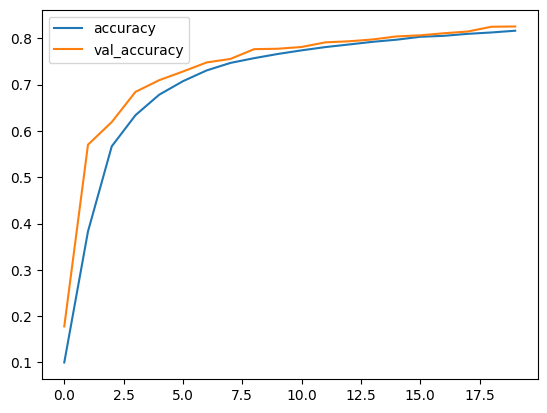

In [74]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

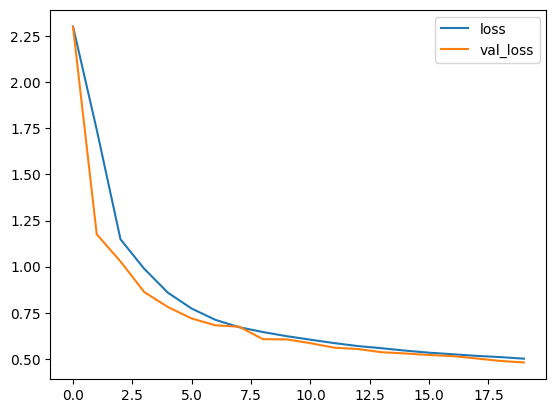

In [75]:
metrics[['loss','val_loss']].plot()
plt.show()

these plots suggest that we should let the model run for more epochs!

# Model predictions

In [77]:
model = keras.models.load_model("CNN_basic.h5")

In [78]:
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [79]:
predictions_prob = model.predict(x_test)
predictions_prob[0]

313/313 [==============================] - 1s 3ms/step


array([3.3801633e-08, 1.5770947e-10, 1.1348268e-08, 7.7121163e-09,
       1.8267439e-08, 3.4772282e-04, 5.5194915e-09, 5.3522113e-04,
       5.2254186e-06, 9.9911171e-01], dtype=float32)

In [80]:
predictions_prob[0].argmax()

9

In [81]:
y_test[0]

9

let's generate prediction classes:
* For binary classification, np.where(y_pred > threshold, 1,0)
* For multiclass classification, np.argmax(predictions, axis=1)

https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead




In [82]:
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5]

array([9, 2, 1, 1, 6])

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.85      0.86      1000
           3       0.89      0.94      0.92      1000
           4       0.84      0.89      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.75      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [85]:
confusion_matrix(y_test,predictions)

array([[830,   0,  20,  26,   2,   0, 115,   0,   7,   0],
       [  2, 973,   1,  18,   2,   0,   2,   0,   2,   0],
       [ 11,   1, 848,   7,  64,   0,  69,   0,   0,   0],
       [  5,   1,   9, 939,  19,   0,  25,   0,   2,   0],
       [  1,   1,  31,  35, 885,   0,  47,   0,   0,   0],
       [  0,   0,   0,   2,   0, 973,   0,  17,   0,   8],
       [ 90,   0,  49,  22,  76,   0, 754,   0,   9,   0],
       [  0,   0,   0,   0,   0,   5,   0, 978,   1,  16],
       [  0,   1,   5,   3,   3,   1,   7,   3, 977,   0],
       [  0,   0,   0,   0,   0,   3,   1,  36,   0, 960]])

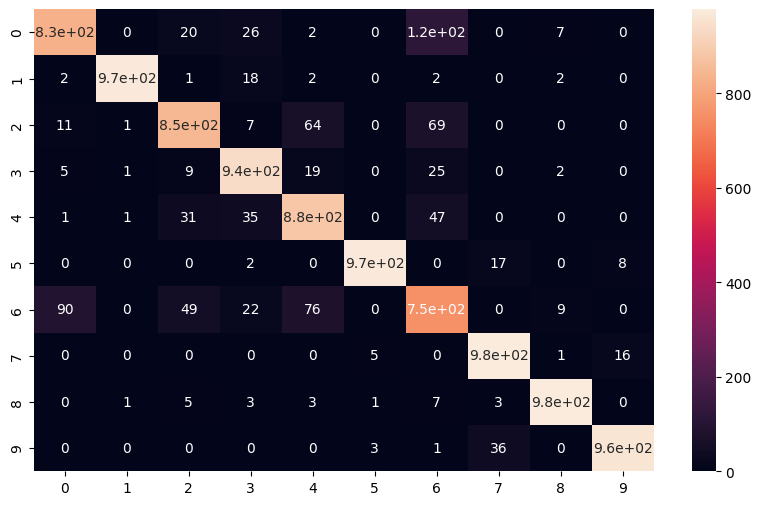

In [86]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

it seems that our basic CNN model has hard time distinguishing T-shirt, Shirts, pullover, dress and coat which makes sense.

Recall:
**Labels**

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


Let's look into some of the misclassified images!

In [87]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [88]:
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[23, 25, 27, 42, 43, 44, 48, 49, 57]

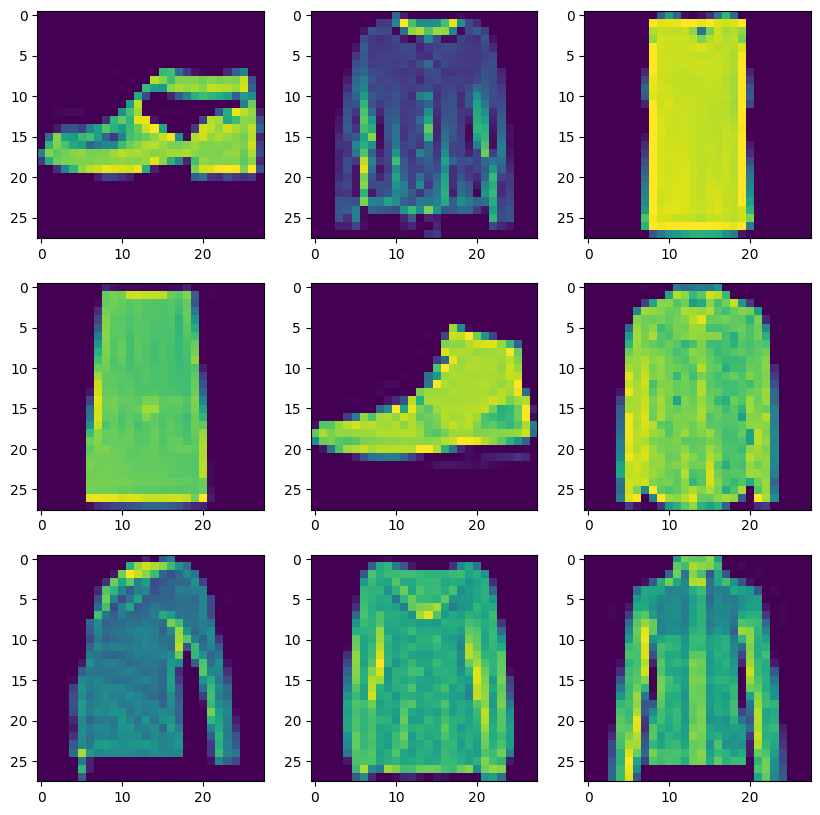

In [89]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [90]:
list(predictions[misclassified_images[:9]])

[5, 2, 6, 6, 9, 4, 6, 6, 6]

In [91]:
actuals

[9, 4, 0, 3, 7, 6, 2, 2, 4]

Recall:
**Labels**

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


#Done